In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

In [73]:
df = pd.read_excel(r"C:\Users\yahia\Downloads\Sparks 6.xlsx")

# Preview of Data


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop('Id',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### As shown there is no missing data in our data set 
#### All data types are right


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Create a bar chart of species distribution
print(df['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# Data visouliztion 


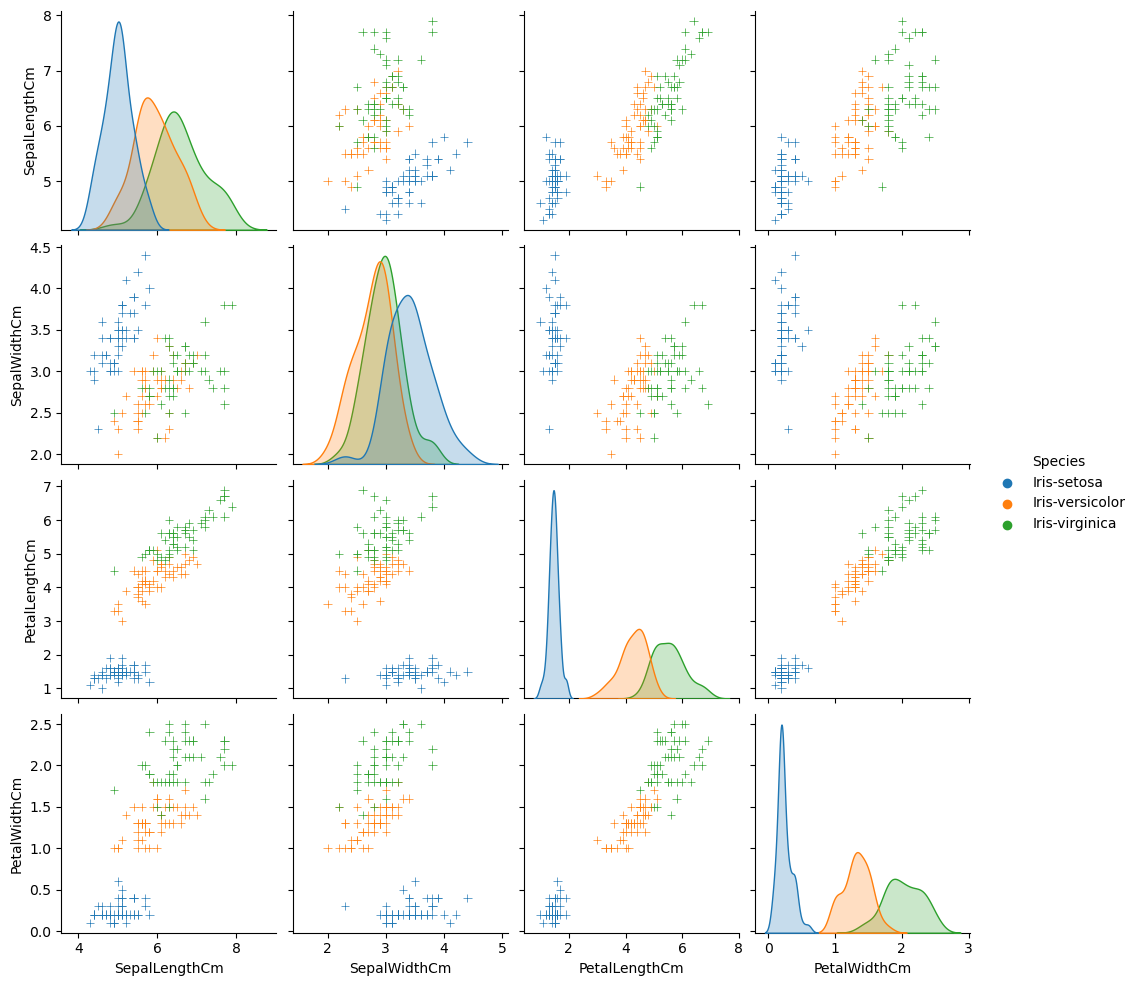

In [8]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

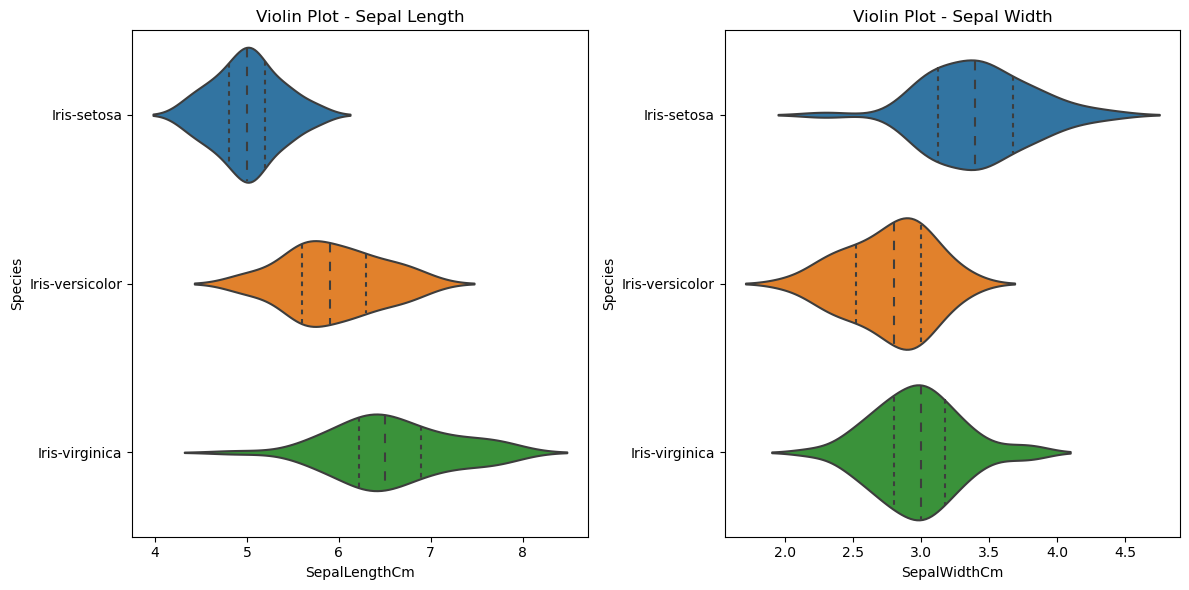

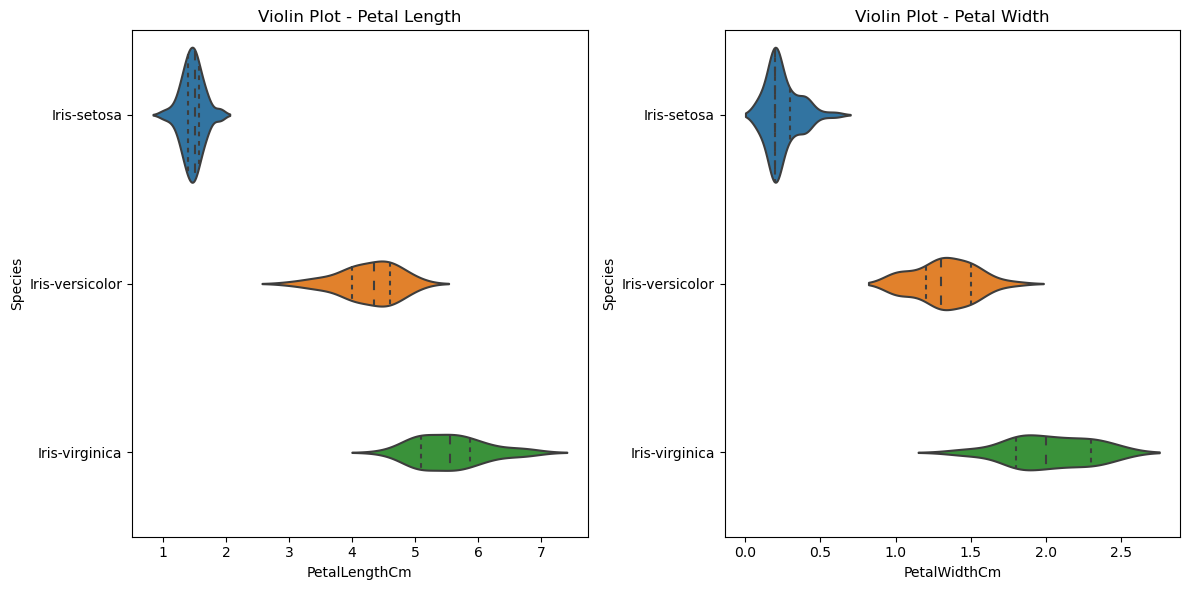

In [9]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
# First subplot: SepalLengthCm and SepalWidthCm
plt.subplot(1, 2, 1)
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.title('Violin Plot - Sepal Length')
plt.subplot(1, 2, 2)
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.title('Violin Plot - Sepal Width')
plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()
# Second subplot: PetalLengthCm and PetalWidthCm
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.title('Violin Plot - Petal Length')
plt.subplot(1, 2, 2)
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.title('Violin Plot - Petal Width')
plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()


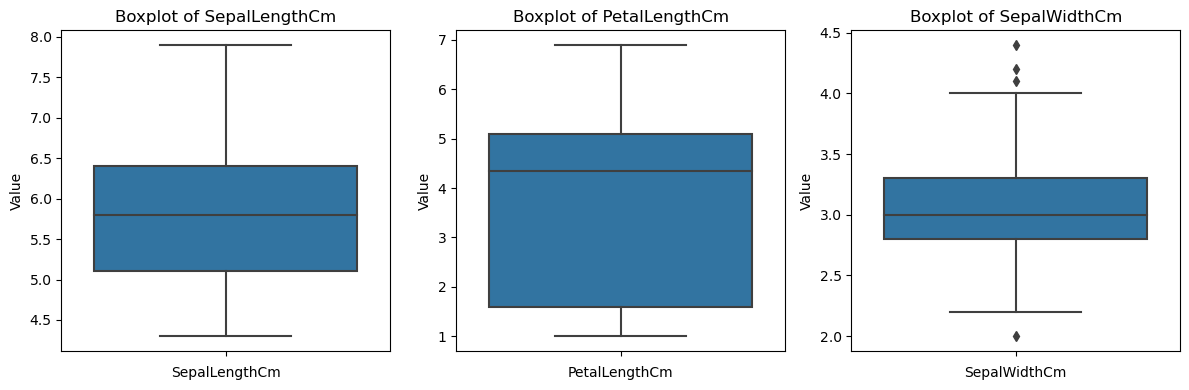

In [10]:
features = ['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm']

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

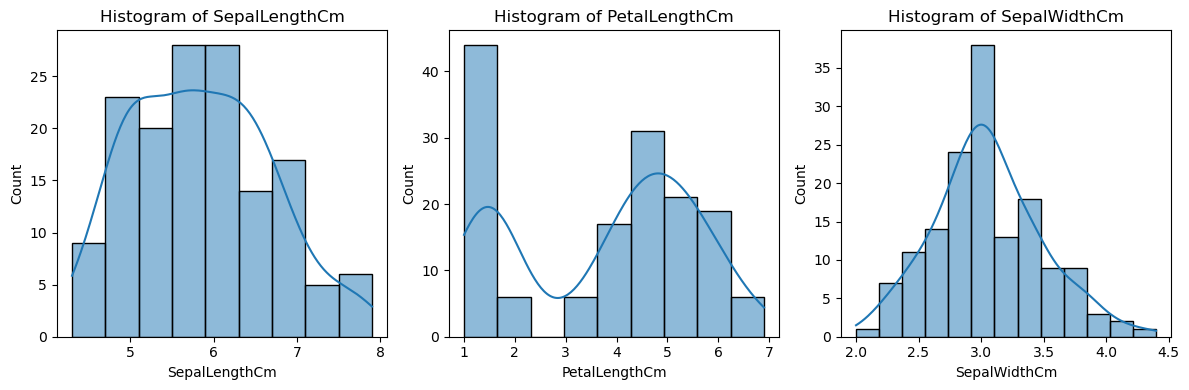

In [11]:
features = ['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm']

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()  # Adjust the spacing between subplots if necessary
plt.show()

C:\Users\yahia\AppData\Local\Temp\ipykernel_15940\548423044.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


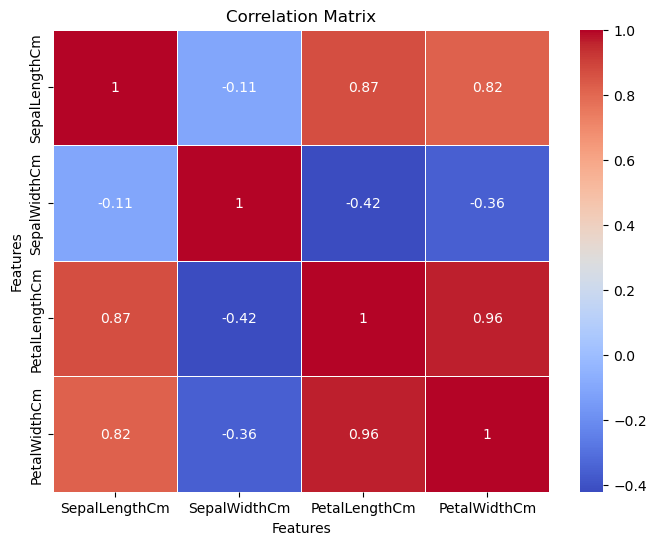

In [12]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix')

plt.show()

# The model


In [13]:
X = df.drop('Species', axis=1)  # Features
y = df['Species']  # Target variable

In [14]:
# Encode the target variable into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% training, 20% validation, 20% testing

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [67]:
# Define a list of classifiers to compare
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

In [68]:
results = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [69]:
# Iterate over each classifier and evaluate its performance
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    for name, classifier in classifiers:
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred_val = classifier.predict(X_val)

        # Calculate performance metrics on validation set
        metrics = {
            'Classifier': name,
            'Accuracy': accuracy_score(y_val, y_pred_val),
            'Precision': precision_score(y_val, y_pred_val, average='macro'),
            'Recall': recall_score(y_val, y_pred_val, average='macro'),
            'F1 Score': f1_score(y_val, y_pred_val, average='macro')
        }

        # Add the results to the DataFrame
        results = results.append(metrics, ignore_index=True)

# Print the results table
print("Validation Set Results:")
print(results)


# Make predictions on the test set using the best classifier
y_pred_test = best_classifier.predict(X_test)

# Calculate performance metrics on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Print the test set results for the best classifier
print("Accuracy: {:.4f}".format(accuracy_test))
print("Precision: {:.4f}".format(precision_test))
print("Recall: {:.4f}".format(recall_test))
print("F1 Score: {:.4f}".format(f1_test))



Validation Set Results:
               Classifier  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.933333   0.933333  0.948718  0.935185
1           Decision Tree  0.900000   0.898148  0.907051  0.901176
2           Random Forest  0.900000   0.898148  0.907051  0.901176
3  Support Vector Machine  0.933333   0.933333  0.948718  0.935185
Accuracy: 0.9667
Precision: 0.9722
Recall: 0.9630
F1 Score: 0.9659


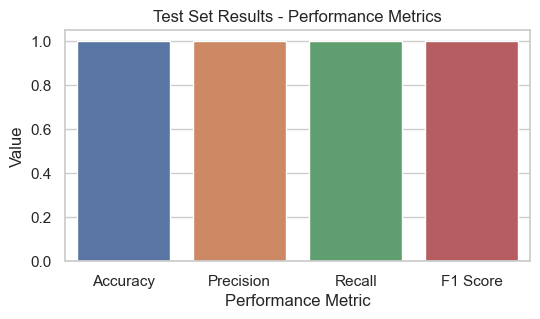

In [58]:
# Visualize the test set results using a bar plot
test_results = {'Accuracy': accuracy_test, 'Precision': precision_test, 'Recall': recall_test, 'F1 Score': f1_test}
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=list(test_results.keys()), y=list(test_results.values()))
ax.set_title('Test Set Results - Performance Metrics')
ax.set_xlabel('Performance Metric')
ax.set_ylabel('Value')
plt.show()

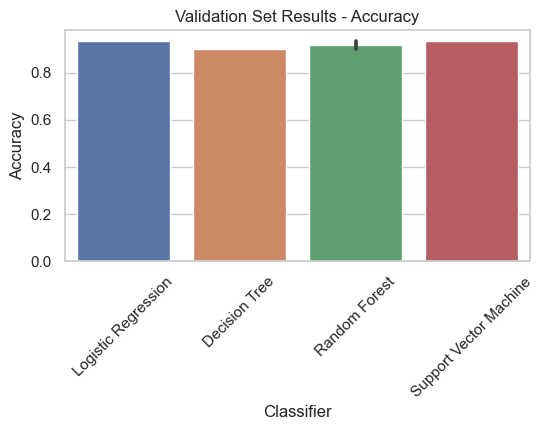

In [59]:
# Visualize the results using a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(6,3))
ax = sns.barplot(x='Classifier', y='Accuracy', data=results)
ax.set_title('Validation Set Results - Accuracy')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
